In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [71]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [49]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [12]:
df = pd.read_excel(r"C:\Users\ACER\Downloads\Wine_clust.xlsx")

In [14]:
print(df.head())

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

In [16]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [18]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

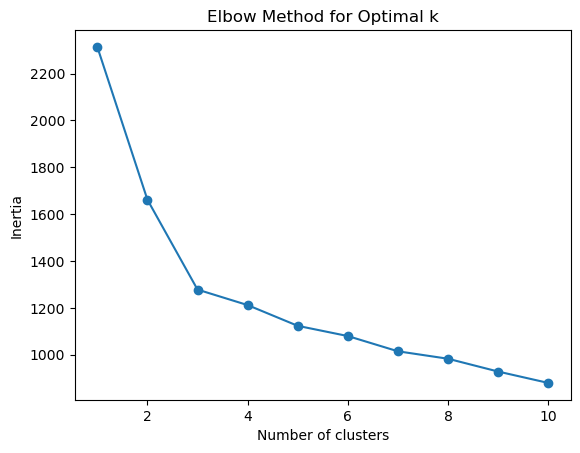

In [59]:
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [20]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

In [22]:
df['KMeans_Labels'] = kmeans_labels

In [24]:
linked = linkage(scaled_data, 'ward')

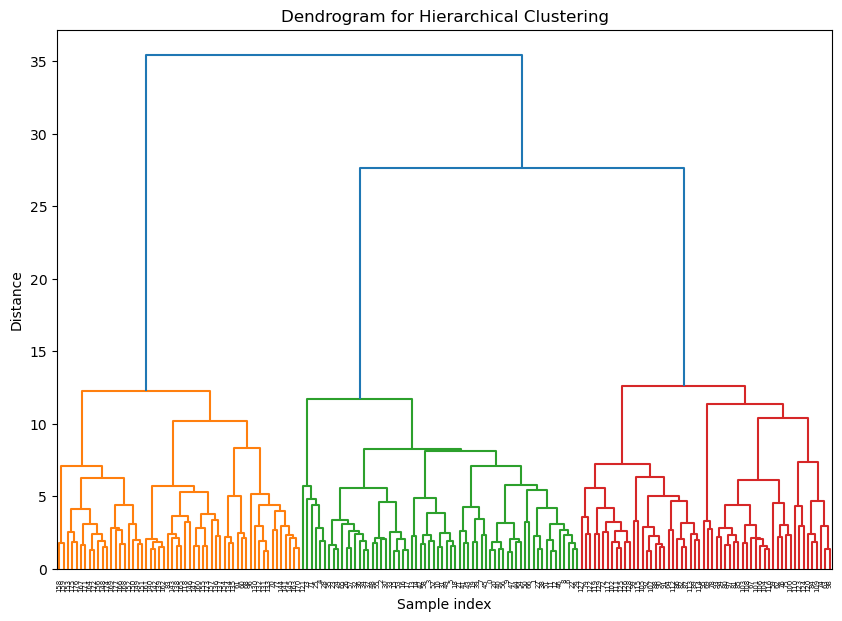

In [26]:
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [28]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

In [34]:
df['DBSCAN_Labels'] = dbscan_labels
print(np.unique(dbscan_labels))

[-1]


In [36]:
if len(np.unique(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(scaled_data, dbscan_labels)
    print(f'Silhouette score for DBSCAN: {dbscan_silhouette}')
else:
    print("DBSCAN did not find more than one cluster, silhouette score cannot be computed.")

DBSCAN did not find more than one cluster, silhouette score cannot be computed.
